# Getting Chicago Data

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
def getData(filename):
    df=pd.read_csv(filename,skipinitialspace=True)
    return df

df_conges=getData('Chicago_Traffic_Tracker_-_Historical_Congestion_Estimates_by_Segment.csv')
df_segment=getData('Chicago_Traffic_Tracker_-_Congestion_Estimates_by_Segments.csv')
df_region=getData('Chicago_Traffic_Tracker_-_Congestion_Estimates_by_Regions.csv')
%matplotlib inline


# Displaying data

In [65]:
## Filtering data with no GPS Data

In [2]:
df_conges = df_conges[(df_conges['MESSAGE COUNT'] > 0)]
df_conges.head()

,TIME,SEGMENTID,BUS COUNT,MESSAGE COUNT,SPEED,ID
2,12/30/2014 11:50:32 PM,1,1,2,25,438597c45a69b452c41cd94eb822f5ea98574ced
3,12/30/2014 11:50:32 PM,1,1,6,25,737422daecadf090fd40901146053c442a970454
7,12/30/2014 11:50:32 PM,1,1,4,23,d3ad49a330b281923c9fafe47573d70caa63c05f
8,12/30/2014 11:50:32 PM,1,1,4,27,ed60e8c095e8517330d93c8581c0c95ccb295e11
9,12/30/2014 11:50:32 PM,1,1,5,26,029e50affd61753016d4723720c86c4500b3815b


In [3]:
import datetime as dt
format = '%m/%d/%Y %I:%M:%S %p'
df_conges['DATE'] = df_conges['TIME'].apply(lambda x: 
                                    dt.datetime.strptime(x,format).date())


In [4]:
if 'TIME' in df_conges.columns:
    df_conges = df_conges.drop(['TIME'],1)
df_conges.head()

df_conges.columns
df_conges=df_conges.rename(columns = {'BUS COUNT                ':'BUS COUNT'})
df_conges.columns

df_conges[['SEGMENTID', 'BUS COUNT','MESSAGE COUNT','SPEED']] = df_conges[['SEGMENTID', 'BUS COUNT','MESSAGE COUNT','SPEED']].astype(int)

# df_conges.head(2)
# df_conges.columns
df_segment_ID_SPEED=df_conges[["ID", "SEGMENTID",'SPEED']]
df_segment_ID_SPEED.head(2)
#df_temp.groupby('cluster')['time'].mean()

,ID,SEGMENTID,SPEED
2,438597c45a69b452c41cd94eb822f5ea98574ced,1,25
3,737422daecadf090fd40901146053c442a970454,1,25


In [6]:
import numpy as np
segmentid_groupby=df_segment_ID_SPEED.groupby(['SEGMENTID'])
segment_speed=segmentid_groupby.aggregate(np.mean)
segment_speed.reset_index(level=0, inplace=True)
segment_speed.head(2)
df_segment_speed = pd.merge(left=segment_speed,right=df_segment, how='left', left_on='SEGMENTID', right_on='SEGMENTID')
df_segment_speed.head(2)

,SEGMENTID,SPEED,STREET,DIRECTION,FROM_STREET,TO_STREET,LENGTH,STREET_HEADING,COMMENTS,START_LONGITUDE,START_LATITUDE,END_LONGITUDE,END_LATITUDE,CURRENT_SPEED,LAST_UPDATED
0,1,23.054939,55th,EB,Pulaski,Central Park,0.5,W,NaN,-87.723160,41.793067,-87.713607,41.793141,22,2016-02-13 19:30:52.0
1,2,20.657741,55th,EB,Central Park,Kedzie,0.5,W,NaN,-87.713607,41.793141,-87.703555,41.793377,16,2016-02-13 19:30:52.0


In [ ]:
# Speed w.r.t. Segments

In [7]:
import folium
CHICAGO_COORDINATES = (41.8369, -87.6847) 
chicgo_segment_map = folium.Map(location=CHICAGO_COORDINATES,zoom_start=12)
chicgo_segment_map.lat_lng_popover()
for i in range(0, df_segment_speed.shape[0]):
    speed=(df_segment_speed.irow(i))['SPEED']
    lat=(df_segment_speed.irow(i))['START_LATITUDE']
    lng=(df_segment_speed.irow(i))['START_LONGITUDE']
    chicgo_segment_map.simple_marker(location=[lat, lng],popup='SPEED:' + str(speed),clustered_marker = True)
chicgo_segment_map.create_map('chicago_map.html')
chicgo_segment_map.render_iframe = True
chicgo_segment_map



/home/mandeepak/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: irow(i) is deprecated. Please use .iloc[i]
/home/mandeepak/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: irow(i) is deprecated. Please use .iloc[i]
/home/mandeepak/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: irow(i) is deprecated. Please use .iloc[i]


In [8]:
df_segment_speed['SPEED']=df_segment_speed['SPEED'].astype(int)
df_segment_speed['CONGESTION'] = None
condition_slow = (df_segment_speed['SPEED'] >=-1) & (df_segment_speed['SPEED'] <=9)
df_segment_speed.loc[condition_slow, 'CONGESTION'] = 10
condition_medium = (df_segment_speed['SPEED'] >=10) & (df_segment_speed['SPEED'] <=20)
df_segment_speed.loc[condition_medium, 'CONGESTION'] = 5
condition_fast = (df_segment_speed['SPEED'] >=21)
df_segment_speed.loc[condition_fast, 'CONGESTION'] = 1

congestion_data=df_segment_speed[['START_LATITUDE','START_LONGITUDE','CONGESTION']].values


In [10]:
import gmaps

In [11]:
gmaps.heatmap(congestion_data)

In [41]:
df_conges.columns

Index([u'SEGMENTID', u'BUS COUNT', u'MESSAGE COUNT', u'SPEED', u'ID', u'DATE'], dtype='object')

In [92]:

df_date_speed=df_conges[['DATE','SPEED']]
df_date_speed=df_date_speed[df_date_speed.SPEED>0]
df_date_speed.head(2)
#df_temp.groupby('cluster')['time'].mean()
date_speed_groupby=df_date_speed.groupby(['DATE'])
average_speed_day=date_speed_groupby.aggregate(np.mean)
average_speed_day.reset_index(level=0, inplace=True)
max_speed_day=date_speed_groupby.aggregate(np.max)
max_speed_day.reset_index(level=0, inplace=True)
min_speed_day=date_speed_groupby.aggregate(np.min)
min_speed_day.head(2)
min_speed_day.reset_index(level=0, inplace=True)
max_speed_day.head(2)

df_date_buscount=df_conges[['DATE','BUS COUNT']]
date_buscount_groupby=df_date_buscount.groupby(['DATE'])
bus_count_day=date_buscount_groupby.aggregate(np.count_nonzero)
bus_count_day.head(2)
bus_count_day.reset_index(level=0, inplace=True)

df_min_max_speed = pd.merge(left=min_speed_day,right=max_speed_day, how='left', left_on='DATE', right_on='DATE')
df_min_max_speed_avg= pd.merge(left=df_min_max_speed,right=average_speed_day, how='left', left_on='DATE', right_on='DATE')

df_min_max_speed_avg_count= pd.merge(left=df_min_max_speed_avg,right=bus_count_day, how='left', left_on='DATE', right_on='DATE')
df_min_max_speed_avg_count=df_min_max_speed_avg_count.rename(columns = {'SPEED_x':'Min Speed','SPEED_y':'Max Speed','SPEED':'Avg Speed'})



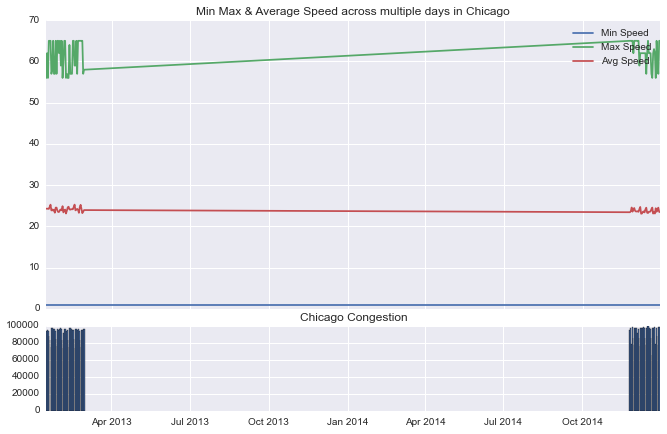

In [98]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
def plotdata(df):
    plt.rcParams['figure.figsize'] = 11, 7

    df_all_traffic=df.set_index('DATE')
    df_all_traffic.head(2)
    main = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
    main.plot(df_all_traffic.index, df_all_traffic['Min Speed'], label='Min Speed')
    main.plot(df_all_traffic.index, df_all_traffic['Max Speed'], label='Max Speed')
    main.plot(df_all_traffic.index, df_all_traffic['Avg Speed'], label='Avg Speed')
    main.axes.xaxis.set_ticklabels([])

    plt.title('Min Max & Average Speed across multiple days in Chicago')
    plt.legend()
    buscount = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
    buscount.bar(df_all_traffic.index, df_all_traffic['BUS COUNT'])

    plt.title('Chicago Congestion ')
plotdata(df_min_max_speed_avg_count)

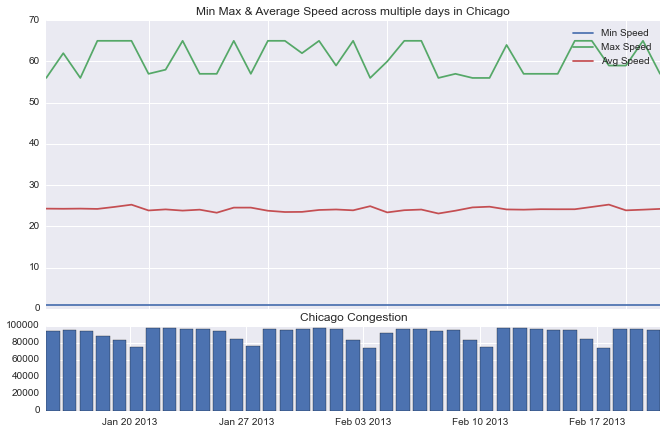

In [99]:
# Subset
from datetime import date

df_subset_=df_min_max_speed_avg_count[(df_min_max_speed_avg_count.DATE>=date(2013,1,15)) &
                                                     (df_min_max_speed_avg_count.DATE<=date(2013,2,20))
                                                     ]
df_subset_.head(10)
#df_min_max_speed_avg_count.head(3)
plotdata(df_subset_)

In [83]:
import numpy as np
df_conges_aggregate=date_groupby.aggregate(np.mean)
df_conges_aggregate.head(2)

,SEGMENTID,BUS COUNT,MESSAGE COUNT,SPEED
DATE,,,,
2011-10-27,1194.000000,1.00000,1.000000,-1.000000
2013-01-15,565.165932,1.84412,10.022824,24.276142
